# Prediction Model

# 1. Data and preprocessing

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('thl_recoded.csv')
data.head()

,kannabis,alcohol_use,nuuska,cigarette,e_cigarette,prob_country,prob_resident,risk_of_use,risk_of_try,cannabis_access,...,household_2.0,household_3.0,education_2.0,education_3.0,education_4.0,violence_treat_2.0,violence_treat_3.0,drug_punishment_2.0,drug_punishment_3.0,drug_punishment_4.0
0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,24.0,13.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,3.0,2.0,23.0,17.0,3.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,5.0,1.0,2.0,1.0,4.0,3.0,24.0,18.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,7.0,2.0,2.0,1.0,3.0,2.0,22.0,12.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,5.0,1.0,1.0,1.0,3.0,2.0,24.0,16.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [3]:
selected_features = ['kannabis', 'alcohol_use',
 'drug_punishment_2.0',
 'violence_treat_2.0',
 'household_2.0',
 'age_bins_(24, 34]',
 'drug_offer_1',
 'drug_user_friend_1',
 'drug_punishment_3.0',
 'helsinki_1',
 'single_1',
 'non_medical_1',
 'has_child_1',
 'drug_punishment_4.0',
 'nuuska',
 'cigarette',
 'current_health',
 'prob_country',
 'e_cigarette',
 'risk_of_try',
 'risk_of_use']

data = data[selected_features]
data.head()

,kannabis,alcohol_use,drug_punishment_2.0,violence_treat_2.0,household_2.0,"age_bins_(24, 34]",drug_offer_1,drug_user_friend_1,drug_punishment_3.0,helsinki_1,...,non_medical_1,has_child_1,drug_punishment_4.0,nuuska,cigarette,current_health,prob_country,e_cigarette,risk_of_try,risk_of_use
0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,2.0,3.0,1.0,13.0,24.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,2.0,3.0,1.0,17.0,23.0
2,0.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2.0,3.0,4.0,1.0,18.0,24.0
3,1.0,7.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,2.0,2.0,3.0,1.0,12.0,22.0
4,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,16.0,24.0


In [4]:
 # Kannabis use
data['kannabis'].value_counts(normalize= True)

0.0    0.914525
1.0    0.085475
Name: kannabis, dtype: float64

In [5]:
# resample by adding samples to minority class using SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 1:], data.iloc[:, 0]

resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_oversamp, Y_over_samp = resample.fit_resample(X, y)



#split data train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversamp,
                                                    Y_over_samp,
                                                    test_size=0.3,
                                                    random_state = 10)



print(f"Class counts after resampling {Counter( Y_over_samp)}")

Class counts after resampling Counter({0.0: 2953, 1.0: 2953})


In [6]:
print('Dimension of train data: ', X_train.shape)
print('Dimension of test data: ', X_test.shape)

Dimension of train data:  (4134, 20)
Dimension of test data:  (1772, 20)


In [7]:
# necessary for XGBoost 
#X_train.columns[X_train.columns.str.contains("[\[\]<]")]
X_train.columns = X_train.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

# 2. Model Building with Cross Validation

I will use the main classification models under the hood of sklearn. I will first analyze based on original data set and then apply the same methods on new data set.

In [8]:
# Load libraries
# plot
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import matplotlib.font_manager

#models                   
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier



In [9]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression(max_iter= 1000)))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('ADA'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    basedModels.append(('Bagging'   , BaggingClassifier()))
    basedModels.append(('XGBoost'   , XGBClassifier(eval_metric='mlogloss')))



    
    return basedModels

In [10]:
def BasedLine2(X_train, y_train, models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [11]:
class PlotBoxR(object):

    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [12]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train, models)
PlotBoxR().PlotResult(names,results)

LR: 0.875906 (0.010786)
LDA: 0.874214 (0.011795)
KNN: 0.888972 (0.011904)
CART: 0.935653 (0.009768)
NB: 0.866222 (0.020894)
SVM: 0.870344 (0.014491)
ADA: 0.955005 (0.007750)
GBM: 0.962982 (0.008822)
RF: 0.967340 (0.007977)
ET: 0.973148 (0.006972)
Bagging: 0.954037 (0.008325)
XGBoost: 0.961048 (0.009542)


In [13]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [14]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

,Model,Score
0,LR,0.8759
1,LDA,0.8742
2,KNN,0.8890
3,CART,0.9357
4,NB,0.8662
5,SVM,0.8703
6,ADA,0.9550
7,GBM,0.9630
8,RF,0.9673
9,ET,0.9731


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    elif nameOfScaler =='robust':
        scaler = RobustScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))
    pipelines.append((nameOfScaler+'Bagging', Pipeline([('Scaler', scaler),('Bagging', BaggingClassifier())])))
    pipelines.append((nameOfScaler+'XGBoost', Pipeline([('Scaler', scaler),('Bagging', XGBClassifier(eval_metric='mlogloss'))])))

    return pipelines 

In [16]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train, models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.874938 (0.009757)
standardLDA: 0.874214 (0.011795)
standardKNN: 0.908810 (0.011257)
standardCART: 0.934681 (0.010859)
standardNB: 0.866222 (0.020894)
standardSVM: 0.945573 (0.009265)
standardAB: 0.955005 (0.007750)
standardGBM: 0.962982 (0.008822)
standardRF: 0.963711 (0.009060)
standardET: 0.971455 (0.008510)
standardBagging: 0.955488 (0.007369)
standardXGBoost: 0.961048 (0.009542)


,Model,Score,Model,Score
0,LR,0.8759,standardLR,0.8749
1,LDA,0.8742,standardLDA,0.8742
2,KNN,0.8890,standardKNN,0.9088
3,CART,0.9357,standardCART,0.9347
4,NB,0.8662,standardNB,0.8662
5,SVM,0.8703,standardSVM,0.9456
6,ADA,0.9550,standardAB,0.9550
7,GBM,0.9630,standardGBM,0.9630
8,RF,0.9673,standardRF,0.9637
9,ET,0.9731,standardET,0.9715


In [17]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.874938 (0.009513)
minmaxLDA: 0.874214 (0.011795)
minmaxKNN: 0.910980 (0.014679)
minmaxCART: 0.935172 (0.008847)
minmaxNB: 0.866222 (0.020894)
minmaxSVM: 0.935170 (0.012711)
minmaxAB: 0.955005 (0.007750)
minmaxGBM: 0.962982 (0.008822)
minmaxRF: 0.965404 (0.010157)
minmaxET: 0.972664 (0.007960)
minmaxBagging: 0.952585 (0.011521)
minmaxXGBoost: 0.961048 (0.009542)


,Model,Score,Model,Score,Model,Score
0,LR,0.8759,standardLR,0.8749,minmaxLR,0.8749
1,LDA,0.8742,standardLDA,0.8742,minmaxLDA,0.8742
2,KNN,0.8890,standardKNN,0.9088,minmaxKNN,0.9110
3,CART,0.9357,standardCART,0.9347,minmaxCART,0.9352
4,NB,0.8662,standardNB,0.8662,minmaxNB,0.8662
5,SVM,0.8703,standardSVM,0.9456,minmaxSVM,0.9352
6,ADA,0.9550,standardAB,0.9550,minmaxAB,0.9550
7,GBM,0.9630,standardGBM,0.9630,minmaxGBM,0.9630
8,RF,0.9673,standardRF,0.9637,minmaxRF,0.9654
9,ET,0.9731,standardET,0.9715,minmaxET,0.9727


In [18]:
models = GetScaledModel('robust')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

robustLR: 0.875663 (0.010529)
robustLDA: 0.874214 (0.011795)
robustKNN: 0.909293 (0.008139)
robustCART: 0.935169 (0.013953)
robustNB: 0.866222 (0.020894)
robustSVM: 0.921867 (0.011301)
robustAB: 0.955005 (0.007750)
robustGBM: 0.962982 (0.008822)
robustRF: 0.966613 (0.007652)
robustET: 0.973390 (0.007263)
robustBagging: 0.953548 (0.010341)
robustXGBoost: 0.961048 (0.009542)


,Model,Score,Model,Score,Model,Score
0,LR,0.8759,standardLR,0.8749,robustLR,0.8757
1,LDA,0.8742,standardLDA,0.8742,robustLDA,0.8742
2,KNN,0.8890,standardKNN,0.9088,robustKNN,0.9093
3,CART,0.9357,standardCART,0.9347,robustCART,0.9352
4,NB,0.8662,standardNB,0.8662,robustNB,0.8662
5,SVM,0.8703,standardSVM,0.9456,robustSVM,0.9219
6,ADA,0.9550,standardAB,0.9550,robustAB,0.9550
7,GBM,0.9630,standardGBM,0.9630,robustGBM,0.9630
8,RF,0.9673,standardRF,0.9637,robustRF,0.9666
9,ET,0.9731,standardET,0.9715,robustET,0.9734


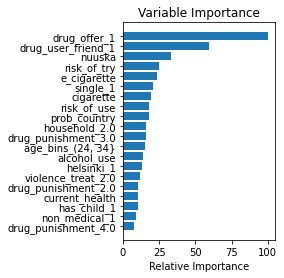

In [19]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=42)

clf.fit(X_train, y_train)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx]) #boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# 3. Cross-Validation and Hyper Parameters Tuning

In [20]:
def plot_matrics(y_pred):    
    
    #y_pred = pipeline.predict(X_test)
    from sklearn import metrics
    from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score

    print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),4))
    print('Precision:', np.round(metrics.precision_score(y_test, y_pred,average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test, y_pred,
                                               average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred,
                                               average='weighted'),4))
    print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred),4))
    print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test, y_pred),4)) 

    from sklearn.metrics import roc_auc_score
    print("roc_auc_score:", roc_auc_score(y_test, y_pred, average=None))

    print('\t\tClassification Report:\n', metrics.classification_report(y_pred,y_test))


    from sklearn.metrics import confusion_matrix
    print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))


    #Plot Confusion Matrix
    from sklearn.metrics import confusion_matrix
    from io import BytesIO #neded for plot
    import seaborn as sns; sns.set()
    import matplotlib.pyplot as plt

    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


    plt.xlabel('true label')
    plt.ylabel('predicted label');

    plt.savefig("Confusion.jpg")
    # Save SVG in a fake file object.
    f = BytesIO()
    plt.savefig(f, format="svg")

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [22]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    



In [23]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

## Logistic Regression

C : Regularization value, the more, the stronger the regularization(double).


RegularizationType: Can be either "L2" or “L1”. Default is “L2”.

In [24]:
# model
model = LogisticRegression(max_iter= 1000)
# Create regularization penalty space
penalty = [ 'l2'] # 'l1',

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [25]:
LR_RandSearch = RandomSearch(X_train,y_train, model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test)

Best: 0.878570 using {'C': 0.0774678314811883, 'penalty': 'l2'}


In [26]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [27]:
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_LR).mean(),7))

prediction on test set is: 0.8944695


Accuracy: 0.8945
Precision: 0.898
Recall: 0.8945
F1 Score: 0.8943
Cohen Kappa Score: 0.7892
Matthews Corrcoef: 0.7926
roc_auc_score: 0.8953550018351618
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       823
         1.0       0.94      0.86      0.90       949

    accuracy                           0.89      1772
   macro avg       0.90      0.90      0.89      1772
weighted avg       0.90      0.89      0.89      1772

Confusion Matrix:
 [[770 134]
 [ 53 815]]


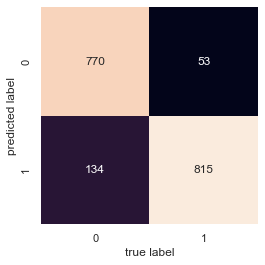

In [28]:
plot_matrics(Prediction_LR)

## KNN

n_neighbors: Number of neighbors to use by default for k_neighbors queries



In [29]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [30]:
KNN_GridSearch = GridSearch(X_train,y_train,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_KNN).mean(),7))

Best: 0.936387 using {'n_neighbors': 2}
prediction on test set is: 0.9430023


Accuracy: 0.943
Precision: 0.9485
Recall: 0.943
F1 Score: 0.9429
Cohen Kappa Score: 0.8862
Matthews Corrcoef: 0.8916
roc_auc_score: 0.9440912890991395
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       807
         1.0       1.00      0.90      0.94       965

    accuracy                           0.94      1772
   macro avg       0.94      0.95      0.94      1772
weighted avg       0.95      0.94      0.94      1772

Confusion Matrix:
 [[805  99]
 [  2 866]]


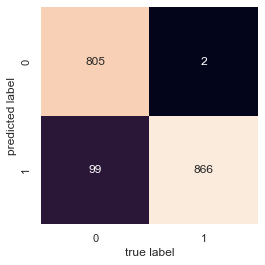

In [31]:
plot_matrics(Prediction_KNN)

## SVC
C: The Penalty parameter C of the error term.

Kernel: Kernel type could be linear, poly, rbf or sigmoid.

In [32]:
#c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
c_values = [50, 100, 200]


kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [33]:
SVC_GridSearch = GridSearch(X_train,y_train,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_SVC).mean(),7))

Best: 0.910018 using {'C': 200, 'kernel': 'rbf'}
prediction on test set is: 0.9068849


Accuracy: 0.9069
Precision: 0.9138
Recall: 0.9069
F1 Score: 0.9066
Cohen Kappa Score: 0.8142
Matthews Corrcoef: 0.8208
roc_auc_score: 0.9081425105012031
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.90       791
         1.0       0.97      0.86      0.91       981

    accuracy                           0.91      1772
   macro avg       0.91      0.91      0.91      1772
weighted avg       0.91      0.91      0.91      1772

Confusion Matrix:
 [[765 139]
 [ 26 842]]


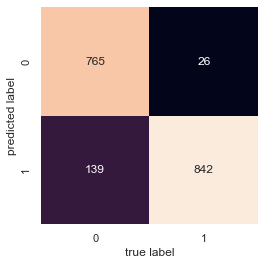

In [34]:
plot_matrics(Prediction_SVC)

## Decision Tree

max_depth: Maximum depth of the tree (double).

row_subsample: Proportion of observations to consider (double).

max_features: Proportion of columns (features) to consider in each level (double).

In [35]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [36]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [37]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train,y_train,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_CART).mean(),7))

Best: 0.933957 using {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1}
prediction on test set is: 0.9469526


Accuracy: 0.947
Precision: 0.947
Recall: 0.947
F1 Score: 0.947
Cohen Kappa Score: 0.8939
Matthews Corrcoef: 0.8939
roc_auc_score: 0.9469765711023205
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       900
         1.0       0.95      0.94      0.95       872

    accuracy                           0.95      1772
   macro avg       0.95      0.95      0.95      1772
weighted avg       0.95      0.95      0.95      1772

Confusion Matrix:
 [[855  49]
 [ 45 823]]


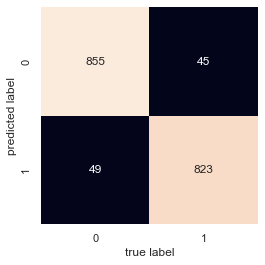

In [38]:
plot_matrics(Prediction_CART)

## AdaBoostClassifier

learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.

n_estimators: Number of trees to build.

In [39]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [40]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train ,y_train,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_Ad).mean(),7))

Best: 0.960089 using {'learning_rate': 0.5, 'n_estimators': 200}
prediction on test set is: 0.9638826


Accuracy: 0.9639
Precision: 0.9639
Recall: 0.9639
F1 Score: 0.9639
Cohen Kappa Score: 0.9277
Matthews Corrcoef: 0.9277
roc_auc_score: 0.9637988866685698
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       910
         1.0       0.96      0.97      0.96       862

    accuracy                           0.96      1772
   macro avg       0.96      0.96      0.96      1772
weighted avg       0.96      0.96      0.96      1772

Confusion Matrix:
 [[875  29]
 [ 35 833]]


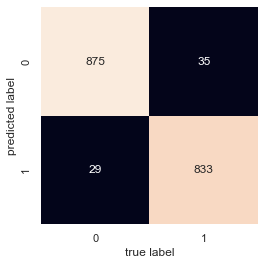

In [41]:
plot_matrics(Prediction_Ad)

# GradientBoosting

In [42]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [43]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train,y_train,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_GB).mean(),7))

Best: 0.962990 using {'learning_rate': 0.05, 'n_estimators': 200}
prediction on test set is: 0.962754


Accuracy: 0.9628
Precision: 0.9628
Recall: 0.9628
F1 Score: 0.9628
Cohen Kappa Score: 0.9255
Matthews Corrcoef: 0.9255
roc_auc_score: 0.9626926919783043
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       908
         1.0       0.96      0.96      0.96       864

    accuracy                           0.96      1772
   macro avg       0.96      0.96      0.96      1772
weighted avg       0.96      0.96      0.96      1772

Confusion Matrix:
 [[873  31]
 [ 35 833]]


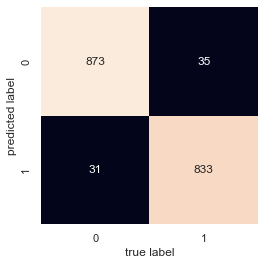

In [44]:
plot_matrics(Prediction_GB)

## Extra tree

In [45]:
n_estimators= [10, 50, 100, 500, 1000]
criterion = ["gini", "entropy"]
max_depth = [ 10, 15, 20]
param_grid = dict(n_estimators=n_estimators_value,
                  criterion = criterion,
                  max_depth = max_depth  
                 )

In [46]:
model_ET = ExtraTreesClassifier()
ET_GridSearch = GridSearch(X_train,y_train,model_ET,param_grid)
Prediction_ET = ET_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_GB).mean(),7))

Best: 0.974601 using {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}
prediction on test set is: 0.962754


Accuracy: 0.9774
Precision: 0.9775
Recall: 0.9774
F1 Score: 0.9774
Cohen Kappa Score: 0.9548
Matthews Corrcoef: 0.9549
roc_auc_score: 0.9775549528975165
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       892
         1.0       0.98      0.97      0.98       880

    accuracy                           0.98      1772
   macro avg       0.98      0.98      0.98      1772
weighted avg       0.98      0.98      0.98      1772

Confusion Matrix:
 [[878  26]
 [ 14 854]]


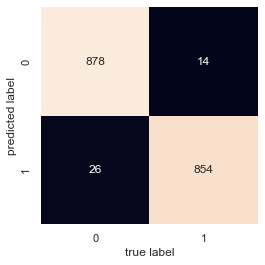

In [47]:
plot_matrics(Prediction_ET)

# XGBoost

In [48]:
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'colsample_bytree': [0.3, 0.7]
}



In [49]:
model_XGB = XGBClassifier(eval_metric='mlogloss', use_label_encoder =False, objective= 'binary:logistic',
    nthread=4,
    seed=42)
GB_GridSearch = GridSearch(X_train,y_train,model_XGB, param_grid)
Prediction_XGB = GB_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_XGB).mean(),7))

Best: 0.965893 using {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 140}
prediction on test set is: 0.9667043


Accuracy: 0.9667
Precision: 0.9669
Recall: 0.9667
F1 Score: 0.9667
Cohen Kappa Score: 0.9334
Matthews Corrcoef: 0.9335
roc_auc_score: 0.9664955548305534
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       921
           1       0.96      0.98      0.97       851

    accuracy                           0.97      1772
   macro avg       0.97      0.97      0.97      1772
weighted avg       0.97      0.97      0.97      1772

Confusion Matrix:
 [[883  21]
 [ 38 830]]


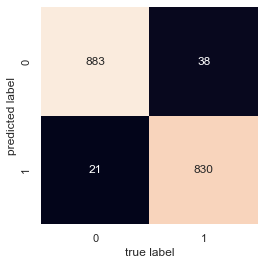

In [50]:
plot_matrics(Prediction_XGB)

## Bagging

In [51]:

n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];



param_grid = {'n_estimators':n_estimators,
              'base_estimator__max_leaf_nodes':[10, 15],
              'base_estimator__max_depth':[4, 5, 6]
              
              
        }
dt = DecisionTreeClassifier()
final_dt = DecisionTreeClassifier(max_leaf_nodes=10, max_depth=5)                   





In [53]:
## If None, then the base estimator is a decision tree.
#model_bagging = BaggingClassifier(base_estimator= None, bootstrap_features=False)

model_bagging = BaggingClassifier(base_estimator=final_dt, random_state=1)


bagging_GridSearch = GridSearch(X_train,y_train,model_bagging, param_grid)
Prediction_bagging = bagging_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_XGB).mean(),7))

Best: 0.939039 using {'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 175}
prediction on test set is: 0.9667043


Accuracy: 0.9362
Precision: 0.9376
Recall: 0.9362
F1 Score: 0.9362
Cohen Kappa Score: 0.8726
Matthews Corrcoef: 0.8739
roc_auc_score: 0.9367659353207456
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       855
         1.0       0.96      0.91      0.94       917

    accuracy                           0.94      1772
   macro avg       0.94      0.94      0.94      1772
weighted avg       0.94      0.94      0.94      1772

Confusion Matrix:
 [[823  81]
 [ 32 836]]


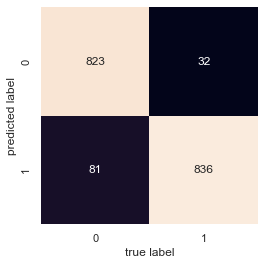

In [54]:
plot_matrics(Prediction_bagging)

# Ensemble Methods

## Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [55]:
from sklearn.ensemble import VotingClassifier

In [56]:
#param = {'C': 0.7678243129497218, 'penalty': 'l1'}
param = {'C': 0.7678243129497218, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

param=  {'max_depth': randint(2, 5),'min_samples_split': randint(5, 20), 'min_samples_leaf': randint(10, 20),
     'n_estimators': randint(50, 100),
     'max_features': uniform(0.6, 0.3)
    }
model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

model10 = BaggingClassifier()

param = {'learning_rate': 0.01, 'n_estimators': 100, 'subsample': 0.8,'max_depth':6, 'colsample_bytree': 1, 'gamma':1}
model11 = XGBClassifier(eval_metric='mlogloss')

In [57]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9),
              ('Bagging',model10), ('XGB',model11)
             ]
    

In [58]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train,y_train, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train,y_train)
pred = ensemble_model.predict(X_test)
print('Accuracy on test:' , (y_test == pred).mean())

Accuracy on train:  0.939766174217169
Accuracy on test: 0.9492099322799097


## Beyond Voting

In [59]:
def get_models():
    """Generate a library of base learners."""
    #param = {'C': 0.7678243129497218, 'penalty': 'l1'}
    param = {'C': 0.7678243129497218, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 1.7, 'kernel': 'linear', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 100}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    model8 = RandomForestClassifier()

    model9 = ExtraTreesClassifier()
    model10 = BaggingClassifier()

    param = {'learning_rate': 0.01, 'n_estimators': 100, 'subsample': 0.8,'max_depth':6, 'colsample_bytree': 1, 'gamma':1}
    model11 = XGBClassifier(eval_metric='mlogloss')

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9,
              'Bagging':model10, 'XGB':model11
              }

    return models

## Error Corrolation

In [60]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [61]:
models = get_models()
P = train_predict(models,X_train,X_test,y_train,y_test)

Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Bagging... done
XGB... done
Done.



[MLENS] backend: threading


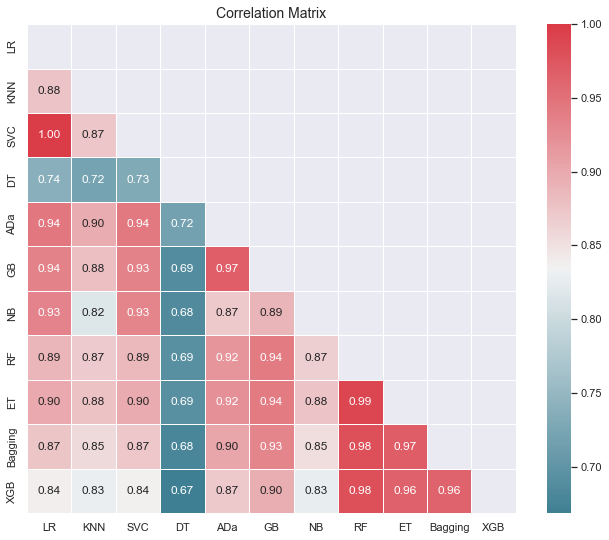

<AxesSubplot:title={'center':'Correlation Matrix'}>

In [62]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)

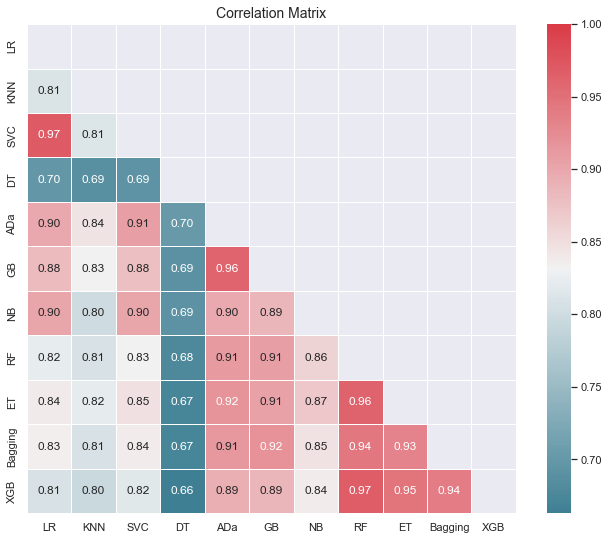

<AxesSubplot:title={'center':'Correlation Matrix'}>

In [63]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test).corr(), inflate=False)

# Stacking

In [64]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=42
)

In [65]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=42,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train, y_train)

# Predict the test set
p_sl = sl.predict_proba(X_test)

# print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test_sc, p_sl[:, 1]))


Fitting 2 layers
Processing layer-1             done | 00:00:13
Processing layer-2             done | 00:00:03
Fit complete                        | 00:00:17

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:01


In [66]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [67]:
print("\nSuper Learner Accuracy score: %.8f" % (y_test== pp).mean())



Super Learner Accuracy score: 0.98024831


In [68]:
# summarize base learners
print(sl.data)




                                       ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier            1.03  0.06  0.05  0.01
layer-1  baggingclassifier             0.20  0.07  0.00  0.00
layer-1  decisiontreeclassifier        0.00  0.00  0.00  0.00
layer-1  extratreesclassifier          0.33  0.01  0.02  0.00
layer-1  gaussiannb                    0.00  0.00  0.00  0.00
layer-1  gradientboostingclassifier    0.79  0.01  0.00  0.00
layer-1  kneighborsclassifier          0.00  0.00  0.04  0.01
layer-1  logisticregression            0.25  0.01  0.00  0.00
layer-1  randomforestclassifier        0.59  0.01  0.02  0.00
layer-1  svc                           4.63  0.20  0.02  0.00
layer-1  xgbclassifier                 3.12  0.17  0.01  0.00



# Summary

- Gridsearch parametrelerini nasil optimize edecegiz? Mesela decision tree based modellerde max_dept arttikca score artiyor, neresei cut-off point olmali?
- Bagging ve extra tree modellerde base model nasil secilmeli?
- variable importance feature agirliklarini veriyor ancak positif veya negative oldugunu nasil gorebiliriz?
- Ensemble modelleri nasil okumak gerekiyor?
- NN modellerini haftaya yapacagim. 






Information about the [codes](https://www.kaggle.com/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86/notebook)